In [23]:
source('functions.R')
source('figure_parameters.R')
seurat = readRDS('Data/tissue_seurat.RDS')


Regressing out: n_genes



Time Elapsed:  26.7879590988159 secs

Scaling data matrix


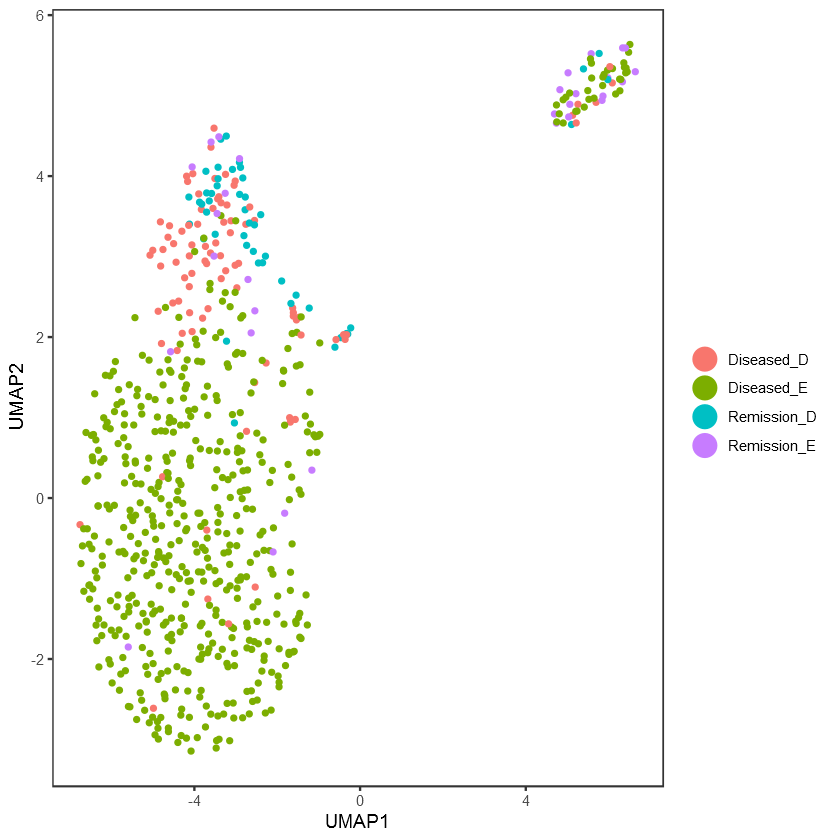

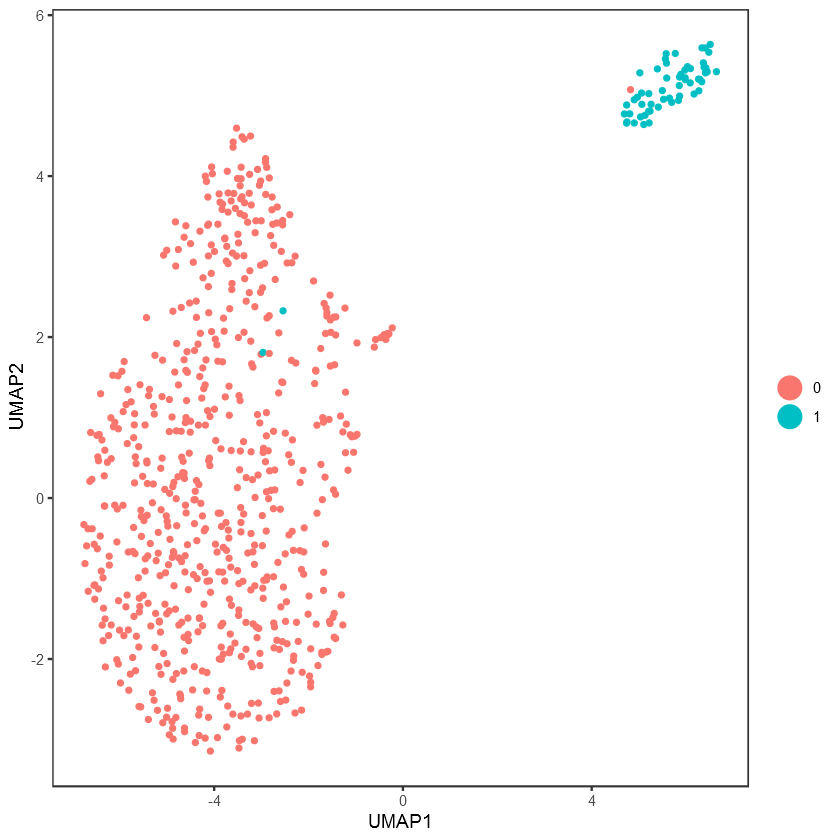

In [3]:
eos = SubsetData(seurat, seurat@cell.names[seurat@meta.data$phenotype == 'Eosinophil'])
eos = pyProcess(eos)
eos = FindClusters(eos, dims.use = 1:10, resolution= .2, print.output = FALSE, force.recalc = TRUE)
DimPlot(eos, 'umap', group.by = 'ci')
DimPlot(eos, 'umap')

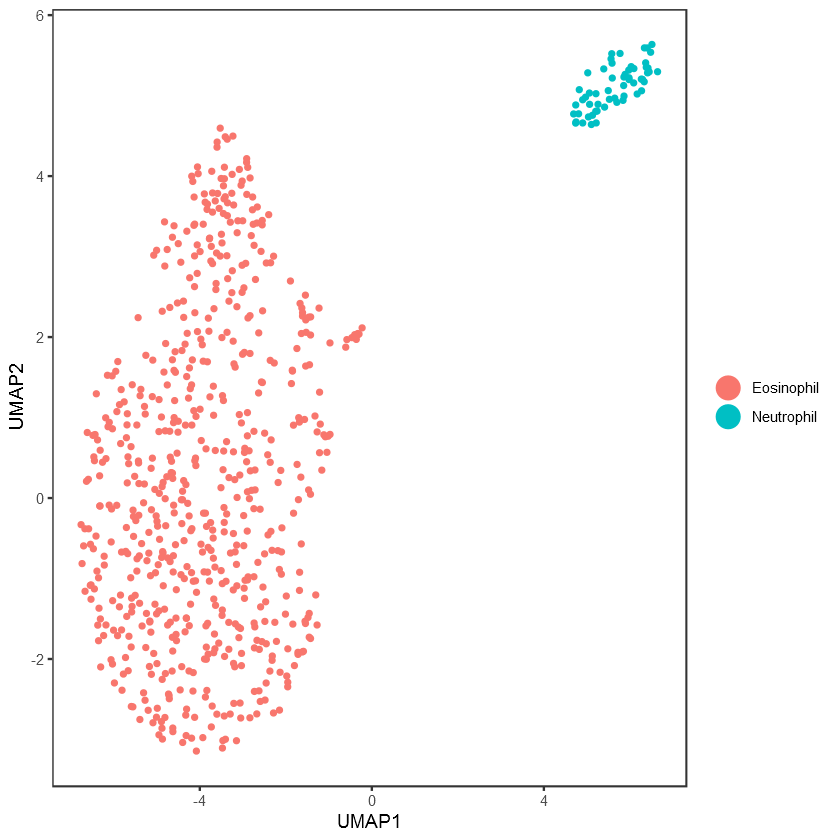

In [5]:
eos@meta.data$sub_phenotype = 'Eosinophil'
eos@meta.data$sub_phenotype[eos@meta.data$res.0.2] = 'Neutrophil'
DimPlot(eos, 'umap', group.by = 'sub_phenotype')

In [4]:
eos = readRDS('L:/Duncan/eoepaper_final/data/eosinophil_seurat.RDS')

In [ ]:
saveRDS('Data/eosinophil_seurat.RDS')


In [7]:
# write expression matrix to .tsv for scenic analysis
write.table(t(as.data.frame(as.matrix(eos@raw.data[,eos@cell.names[eos@meta.data$sub_phenotype == 'Eosinophil']]))), 'eos_only.tsv', quote = FALSE, sep = '\t')